# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1275.
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.90e-44
Time:                        04:06:06   Log-Likelihood:                 7.8506
No. Observations:                  50   AIC:                            -7.701
Df Residuals:                      46   BIC:                          -0.05319
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0099      0.073     68.171      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.5564236   5.01626147  5.43916682  5.79932633  6.08024262  6.27744461
  6.39922221  6.46526424  6.50342365  6.54514134  6.62028053  6.75222029
  6.95401444  7.22624685  7.55693551  7.92350112  8.29647684  8.64434956
  8.93873748  9.1590531   9.29588571  9.35254756  9.34452964  9.29695657
  9.24045868  9.20613956  9.2204658   9.30091864  9.45312179  9.66991755
  9.93254272 10.21371142 10.48209801 10.70748386 10.86572214 10.94270511
 10.93668197 10.85854651 10.73004729 10.58021442 10.44058998 10.34004577
 10.30003973 10.33109047 10.43104911 10.5854523  10.76989854 10.95405726
 11.10665205 11.20059928]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.20968216 11.09409721 10.87241903 10.58697682 10.29349067 10.04742938
  9.89042973  9.84010237  9.88572011  9.99084429]


## Plot comparison

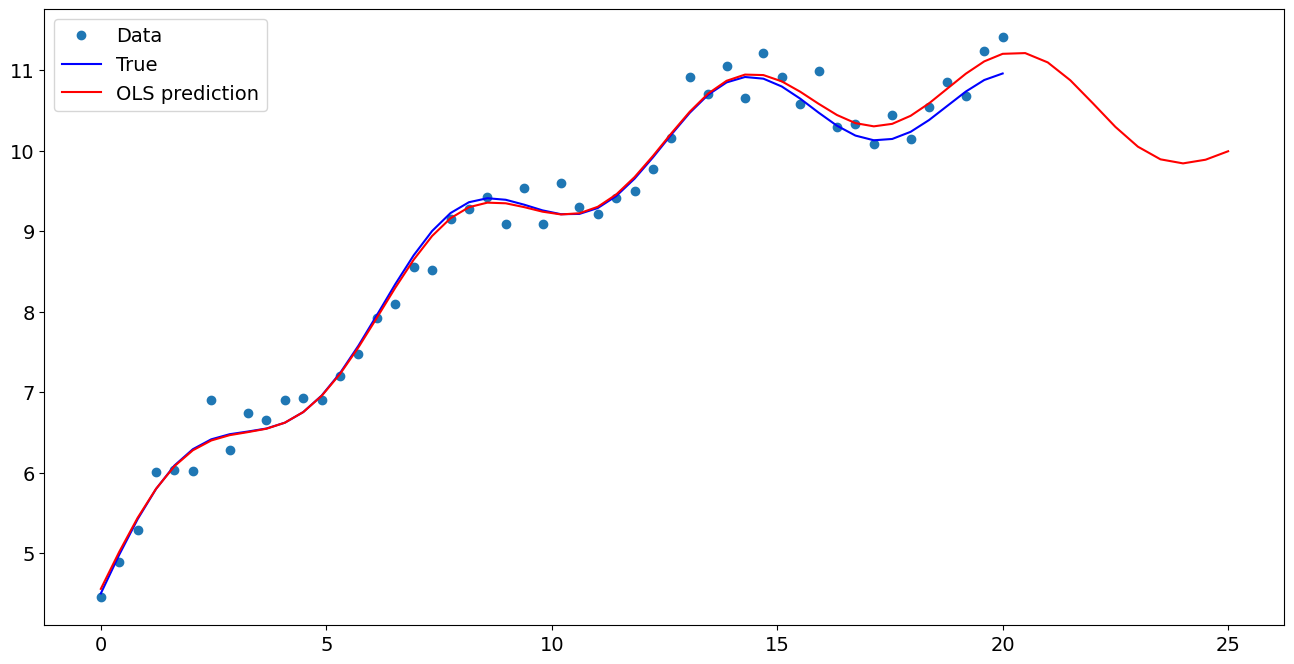

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.009943
x1                  0.491996
np.sin(x1)          0.473646
I((x1 - 5) ** 2)   -0.018141
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.209682
1    11.094097
2    10.872419
3    10.586977
4    10.293491
5    10.047429
6     9.890430
7     9.840102
8     9.885720
9     9.990844
dtype: float64